- Multinominal Naive Bayes Theory
- TF-IDF Transformation
- Rule based Sentiment Analysis (VADER)
- Word2vec implementation (demo only)

In [1]:
import pandas as pd
import numpy as np
import nltk

In [2]:
url = 'https://bit.ly/2S2yXEd'
imdb = pd.read_csv(url)
imdb.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [3]:
imdb['sentiment'].value_counts() / imdb.shape[0] * 100

1    51.604278
0    48.395722
Name: sentiment, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(imdb, test_size=0.2, random_state=1)

In [6]:
def clean_sentence(doc, stopwords, stemmer):
    words = doc.split(' ')
    words_clean = [stemmer.stem(word) for word in words if word not in stopwords]
    return ' '.join(words_clean)
    
def clean_documents(docs_raw):
    stopwords = nltk.corpus.stopwords.words('english')
    stemmer = nltk.stem.PorterStemmer()
    docs = docs_raw.str.lower().str.replace('[^a-z ]', '')
    docs_clean = docs.apply(lambda doc: clean_sentence(doc, stopwords, stemmer))
    return docs_clean
train_docs_clean = clean_documents(train['review'])
train_docs_clean.head()

487    mani continu error one user comment differ car...
652               im sorri realli cant recommend anyon  
667    charact onedimension even good guy especi bad ...
537                                           noth new  
194    think robert ryan best film portray someon lik...
Name: review, dtype: object

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
vectorizer = CountVectorizer(min_df=1).fit(train_docs_clean)
dtm_train = vectorizer.transform(train_docs_clean)

test_docs_clean = clean_documents(test['review'])
dtm_test = vectorizer.transform(test_docs_clean)

In [35]:
df_dtm = pd.DataFrame(dtm_train.toarray(),columns=vectorizer.get_feature_names())
df_dtm.iloc[0].sort_values(ascending=False).head(10)

one         2
joe         2
scene       2
hair        1
chang       1
error       1
configur    1
mani        1
continu     1
car         1
Name: 0, dtype: int64

In [17]:
from sklearn.naive_bayes import MultinomialNB
model_nb = MultinomialNB().fit(dtm_train, train['sentiment'])
test_pred = model_nb.predict(dtm_test)
accuracy_score(test['sentiment'], test_pred)

0.7533333333333333

# https://github.com/skathirmani/text-analytics

## Term Frequency - Inverse Document Frequency

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer().fit(train_docs_clean)
dtm_train = tfidf_vectorizer.transform(train_docs_clean)
dtm_test = tfidf_vectorizer.transform(test_docs_clean)

In [22]:
# pd.DataFrame(dtm_train.toarray(), columns=tfidf_vectorizer.get_feature_names())

In [37]:
df_dtm = df_dtm = pd.DataFrame(dtm_train.toarray(),columns=vectorizer.get_feature_names())
df_dtm.iloc[0].sort_values(ascending=False).head(10)

joe          0.443970
scene        0.291439
one          0.233445
hair         0.221985
user         0.221985
facial       0.221985
error        0.221985
configur     0.221985
glassesth    0.221985
garag        0.221985
Name: 0, dtype: float64

In [23]:
model_nb = MultinomialNB().fit(dtm_train, train['sentiment'])
test_pred = model_nb.predict(dtm_test)
accuracy_score(test['sentiment'], test_pred)

0.7866666666666666

# Sentiment Analysis
- Rule based sentiment analysis
    - Pros: Can be used even if we do not have labels
    - Cons
        - Cannot be used for regional langauges
        - Cannot understand sarcasm
- Document classification
    - Pros: Can be applied even for regional languages
    - Cons: You need labelled data set to start with; Time consuming

### VADER: Valence Aware Dictionary and sEntiment Reasoner

In [38]:
from nltk.sentiment import SentimentIntensityAnalyzer
calc_senti = SentimentIntensityAnalyzer()

In [43]:
print(calc_senti.polarity_scores('i love india'))
print(calc_senti.polarity_scores('i LOVE india'))
print(calc_senti.polarity_scores('i LOVE india :)'))

{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.6369}
{'neg': 0.0, 'neu': 0.169, 'pos': 0.831, 'compound': 0.7125}
{'neg': 0.0, 'neu': 0.112, 'pos': 0.888, 'compound': 0.8374}


In [44]:
print(calc_senti.polarity_scores('i love india')['compound'])

0.6369


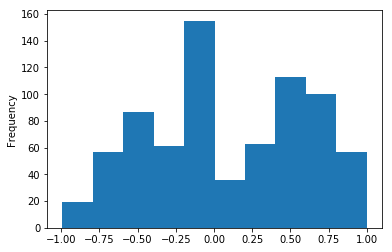

In [49]:
%matplotlib inline
imdb['sentiment_compound'] = imdb['review'].apply(
    lambda v: calc_senti.polarity_scores(v)['compound'])
imdb['sentiment_compound'].plot.hist()

In [53]:
def get_sentiment(compound):
    # return 'Positive' if compound > 0 else 'Negative'
    return 1 if compound > 0 else 0
imdb['sentiment_vader'] = imdb['sentiment_compound'].apply(get_sentiment)
imdb[['sentiment', 'sentiment_compound', 'sentiment_vader']].head(2)

,sentiment,sentiment_compound,sentiment_vader
0,0,-0.4215,0
1,0,-0.5507,0


In [54]:
accuracy_score(imdb['sentiment'], imdb['sentiment_vader'])

0.7941176470588235

In [65]:
calc_senti.polarity_scores('i hate cofee and tea')

{'neg': 0.552, 'neu': 0.448, 'pos': 0.0, 'compound': -0.5719}

In [67]:
3.7/6.7
3/6.7

0.44776119402985076

In [64]:
3.7/9.9
4.2/9.9
2/9.9

0.20202020202020202

In [68]:
alpha = 15
score = -2.7
import math
norm_score = score / math.sqrt((score * score) + alpha)
norm_score

-0.5718850320700721

In [71]:
hotstar_url ='https://bit.ly/2Y5OLte'
hotstar = pd.read_csv(hotstar_url)
#hotstar.head()
# Text Column: Reviews
# Target: Sentiment_Manual

### Exercise

- Split your data in to train and testing (20%)
- Columns
    - ```Input: Reviews```
    - ```Target: Sentiment_Manual```
- Clean the text column and create dtm for training data
- Build random forest(300), multi nominal naive bayes & Ada boost (300)
- Report the accuracy score for all above models using test data

- Predict sentiment using vader package as well using the test data
- Report accuracy
- Compare sentiment analysis using text classification and VADER method
- Report the best technique

## Sentiment Trending Analysis

In [75]:
def get_sentiment(review, sentiment_analyser):
    compound = sentiment_analyser.polarity_scores(review)['compound']
    if compound > 0.2:
        return 'Positive'
    elif compound < -0.2:
        return 'Negative'
    else:
        return 'Neutral'
sentiment_analyser = SentimentIntensityAnalyzer()
hotstar['sentiment_vader'] = hotstar['Reviews'].apply(
    lambda v: get_sentiment(v, sentiment_analyser))

In [82]:
import matplotlib.pyplot as plt
summary = hotstar.groupby(['Created_Date',
                           'sentiment_vader']).size().reset_index()
summary = summary.rename(columns={0: 'count'})

Text(0.5,1,'Trending Analysis on user sentiments')

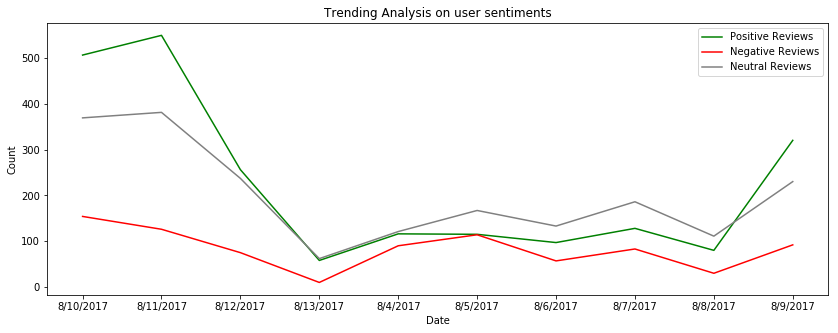

In [94]:
pos_counts = summary[summary['sentiment_vader'] == 'Positive']
neg_counts = summary[summary['sentiment_vader'] == 'Negative']
neu_counts = summary[summary['sentiment_vader'] == 'Neutral']
plt.figure(figsize=(14,5))
plt.plot(pos_counts['Created_Date'], pos_counts['count'], color='green')
plt.plot(neg_counts['Created_Date'], neg_counts['count'], color='red')
plt.plot(neu_counts['Created_Date'], neu_counts['count'], color='gray')
plt.legend(['Positive Reviews', 'Negative Reviews', 'Neutral Reviews'])
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Trending Analysis on user sentiments')

In [95]:
import matplotlib
matplotlib.__version__

'2.2.2'